In [1]:
import sys 
sys.path.append("../")

In [2]:
from mps_utils import * 
from wave_circuit import * 
import matplotlib.pyplot as plt 
import pickle

In [3]:
f1 = lambda x :  np.exp(-(x/2-0.5)**2/0.01)
df1 = lambda x: ( -(x/2-0.5)/(0.01) ) * f1(x)

f2 = lambda x :  (x/2-0.5)/0.01 * f1(x)
df2 = lambda x: (x/2-0.5)/0.01 * df1(x) + 50 * f1(x)

f3 = lambda x: (1-(x/2-0.5)**2/0.01) * f1(x)
df3 = lambda x: -(x/2-0.5)/0.01 * f1(x) + (1-(x/2-0.5)**2/0.01)*df1(x)

m = 5
l = 2**m
x_coarse = np.linspace(0,1,l+1)

In [4]:
p1 = get_polys(x_coarse,f1,df1)
p2 = get_polys(x_coarse,f2,df2)
p3 = get_polys(x_coarse,f3,df3)

def apply(p,x):
    return np.dot(p,[x**i for i in range(len(p))])

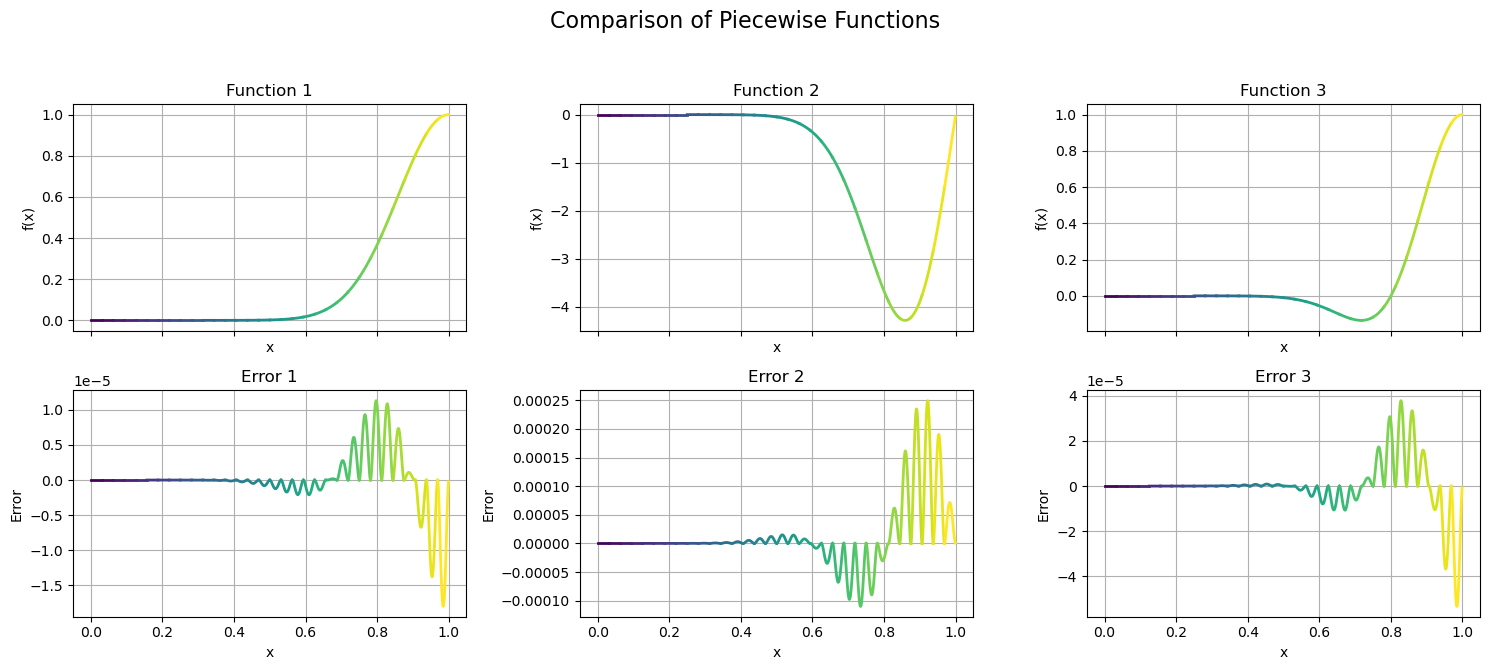

In [5]:

n = 10
N = 2**n
x = np.linspace(0, 1 - 1/N, N)

fig, ax = plt.subplots(2, 3, figsize=(15, 7),sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']
colors = plt.cm.viridis(np.linspace(0, 1, l))  # 16 shades for curves

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][0].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][0].set_title(titles[0])
    ax[0][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][1].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][1].set_title(titles[1])
    ax[0][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][2].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][2].set_title(titles[2])
    ax[0][2].grid(True)

for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

titles = ['Error 1', 'Error 2', 'Error 3']

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][0].plot(xi, apply(v, xi)-f1(xi), color=colors[idx], linewidth=2)
    ax[1][0].set_title(titles[0])
    ax[1][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][1].plot(xi, apply(v, xi)-f2(xi), color=colors[idx], linewidth=2)
    ax[1][1].set_title(titles[1])
    ax[1][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][2].plot(xi, apply(v, xi)-f3(xi), color=colors[idx], linewidth=2)
    ax[1][2].set_title(titles[2])
    ax[1][2].grid(True)

for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../Figures/PiecewiseRepPer.pdf',dpi=300)
plt.show()

In [6]:
M_list1 = []
for i,p in enumerate(p1):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list1.append(M)

M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

M_list2 = []
for i,p in enumerate(p2):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list2.append(M)

M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

M_list3 = []
for i,p in enumerate(p3):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list3.append(M)

M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

M_final1 = trunc_mps(M_full1,2)
M_final2 = trunc_mps(M_full2,2)
M_final3 = trunc_mps(M_full3,2)

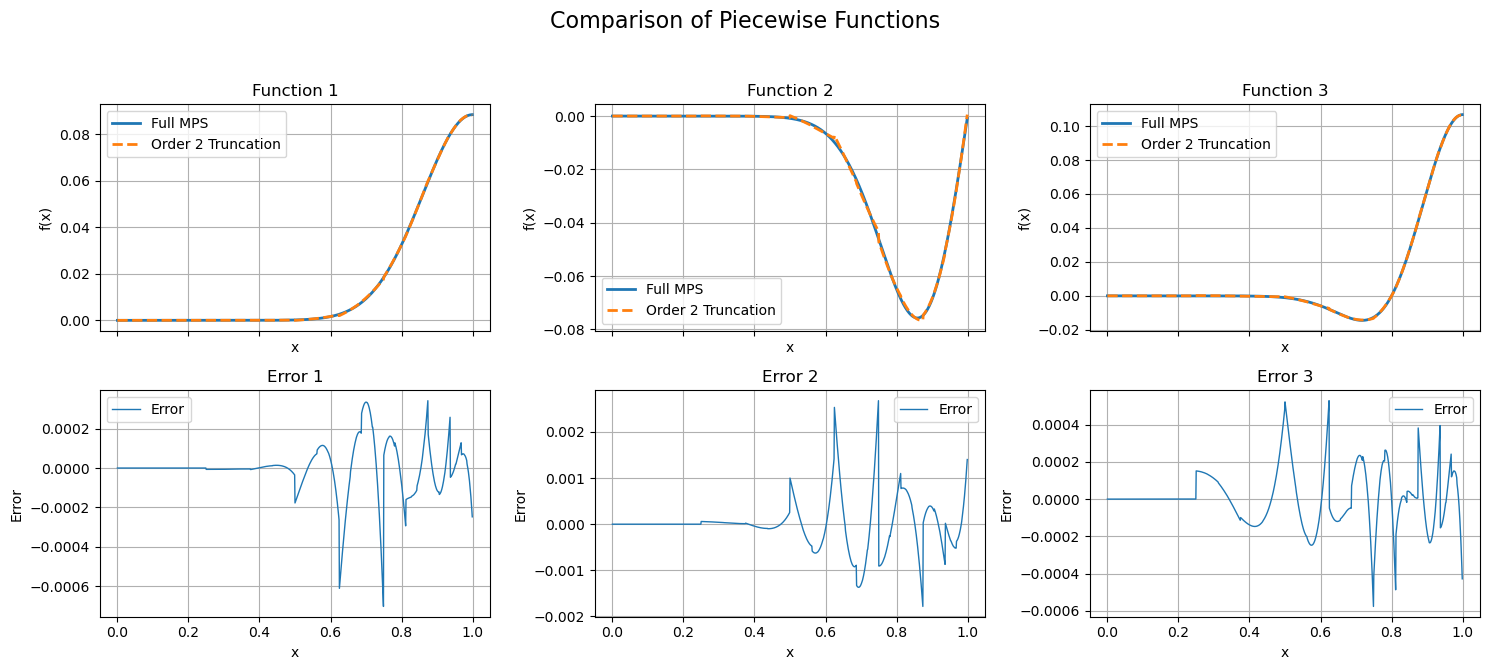

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']

# Row 0: Function comparisons
ax[0][0].plot(x, get_state(M_full1)/np.linalg.norm(get_state(M_full1)), label='Full MPS', linewidth=2)
ax[0][0].plot(x, get_state(M_final1), '--', label='Order 2 Truncation', linewidth=2)
ax[0][0].set_title(titles[0])
ax[0][0].grid(True)
ax[0][0].legend()

ax[0][1].plot(x, get_state(M_full2)/np.linalg.norm(get_state(M_full2)), label='Full MPS', linewidth=2)
ax[0][1].plot(x, get_state(M_final2), '--', label='Order 2 Truncation', linewidth=2)
ax[0][1].set_title(titles[1])
ax[0][1].grid(True)
ax[0][1].legend()

ax[0][2].plot(x, get_state(M_full3)/np.linalg.norm(get_state(M_full3)), label='Full MPS', linewidth=2)
ax[0][2].plot(x, get_state(M_final3), '--', label='Order 2 Truncation', linewidth=2)
ax[0][2].set_title(titles[2])
ax[0][2].grid(True)
ax[0][2].legend()

# Axes labels
for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

# Row 1: Error plots
titles = ['Error 1', 'Error 2', 'Error 3']

ax[1][0].plot(x, get_state(M_final1) - f1(x)/np.linalg.norm(f1(x)), label='Error', linewidth=1)
ax[1][0].set_title(titles[0])
ax[1][0].grid(True)
ax[1][0].legend()

ax[1][1].plot(x, get_state(M_final2) - f2(x)/np.linalg.norm(f2(x)), label='Error', linewidth=1)
ax[1][1].set_title(titles[1])
ax[1][1].grid(True)
ax[1][1].legend()

ax[1][2].plot(x, get_state(M_final3) - f3(x)/np.linalg.norm(f3(x)), label='Error', linewidth=1)
ax[1][2].set_title(titles[2])
ax[1][2].grid(True)
ax[1][2].legend()

# Axes labels
for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../Figures/MPS2Rep.pdf', dpi=300)
plt.show()

In [8]:
l1 = []
l2 = []
l3 = []

dim2_MPS = [[], [], []]

for n in range(5, 15):
    N = 2**n
    x = np.linspace(0, 1 - 1/N, N)

    M_list1 = []
    for i,p in enumerate(p1):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list1.append(M)

    M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

    M_list2 = []
    for i,p in enumerate(p2):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list2.append(M)

    M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

    M_list3 = []
    for i,p in enumerate(p3):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list3.append(M)

    M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

    M_final1 = trunc_mps(M_full1,2)
    M_final2 = trunc_mps(M_full2,2)
    M_final3 = trunc_mps(M_full3,2)
    
    dim2_MPS[0].append(M_final1)
    dim2_MPS[1].append(M_final2)
    dim2_MPS[2].append(M_final3)
    
    true_f1 = f1(x)/np.linalg.norm(f1(x))
    true_f2 = f2(x)/np.linalg.norm(f2(x))
    true_f3 = f3(x)/np.linalg.norm(f3(x))
    
    l1.append(1 - abs(true_f1 @ get_state(M_final1))**2)
    l2.append(1 - abs(true_f2 @ get_state(M_final2))**2)
    l3.append(1 - abs(true_f3 @ get_state(M_final3))**2)

In [9]:
l41 = []
l42 = []
l43 = []

dim4_MPS = [[], [], []]

for n in range(5, 15):
    N = 2**n
    x = np.linspace(0, 1 - 1/N, N)

    M_list1 = []
    for i,p in enumerate(p1):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list1.append(M)

    M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

    M_list2 = []
    for i,p in enumerate(p2):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list2.append(M)

    M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

    M_list3 = []
    for i,p in enumerate(p3):
        reg = [i//2**_%2 for _ in range(m)[::-1]]
        M = MPS_poly(n,p,reg)
        M_list3.append(M)

    M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

    M_final1 = trunc_mps(M_full1,4)
    M_final2 = trunc_mps(M_full2,4)
    M_final3 = trunc_mps(M_full3,4)
    
    dim4_MPS[0].append(M_final1)
    dim4_MPS[1].append(M_final2)
    dim4_MPS[2].append(M_final3)
    
    true_f1 = f1(x)/np.linalg.norm(f1(x))
    true_f2 = f2(x)/np.linalg.norm(f2(x))
    true_f3 = f3(x)/np.linalg.norm(f3(x))
    
    l41.append(abs(1 - abs(true_f1 @ get_state(M_final1))**2))
    l42.append(abs(1 - abs(true_f2 @ get_state(M_final2))**2))
    l43.append(abs(1 - abs(true_f3 @ get_state(M_final3))**2))

Text(0, 0.5, 'Infidelty')

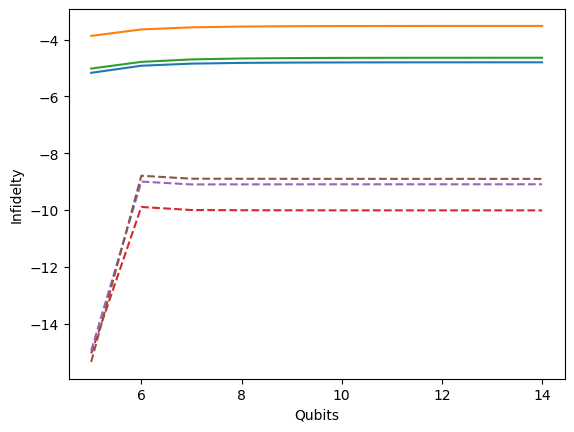

In [10]:
plt.plot(range(5,15), np.log10(l1),label= 'f1')
plt.plot(range(5,15), np.log10(l2),label= 'f2')
plt.plot(range(5,15), np.log10(l3),label= 'f3')

plt.plot(range(5,15), np.log10(l41),'--',label= 'f1')
plt.plot(range(5,15), np.log10(l42),'--',label= 'f2')
plt.plot(range(5,15), np.log10(l43),'--',label= 'f3')
plt.xlabel('Qubits')
plt.ylabel('Infidelty')

In [15]:
from qiskit.quantum_info import Statevector 

l41_circ1 = []
l42_circ1 = []
l43_circ1 = []

l41_circ2 = []
l42_circ2 = []
l43_circ2 = []

for n in range(5, 15):
    N = 2**n
    x = np.linspace(0, 1 - 1/N, N)

    M_final1 = dim4_MPS[0][n-5]
    M_final2 = dim4_MPS[1][n-5]
    M_final3 = dim4_MPS[2][n-5]
    
    true_f1 = f1(x)/np.linalg.norm(f1(x))
    true_f2 = f2(x)/np.linalg.norm(f2(x))
    true_f3 = f3(x)/np.linalg.norm(f3(x))
    
    circ1_1 = QuantumCircuit(n)
    circ1_2 = QuantumCircuit(n)
    circ1_1.append(circ_from_layers(get_layers(M_final1,1)), range(n))
    circ1_2.append(circ_from_layers(get_layers(M_final1,2)), range(n))
    
    circ2_1 = QuantumCircuit(n)
    circ2_2 = QuantumCircuit(n)
    circ2_1.append(circ_from_layers(get_layers(M_final2,1)), range(n))
    circ2_2.append(circ_from_layers(get_layers(M_final2,2)), range(n))
    
    circ3_1 = QuantumCircuit(n)
    circ3_2 = QuantumCircuit(n)
    circ3_1.append(circ_from_layers(get_layers(M_final3,1)), range(n))
    circ3_2.append(circ_from_layers(get_layers(M_final3,2)), range(n))

    
    l41_circ1.append(abs(1 - abs(true_f1 @ Statevector(circ1_1.reverse_bits()).data)**2))
    l42_circ1.append(abs(1 - abs(true_f2 @ Statevector(circ2_1.reverse_bits()).data)**2))
    l43_circ1.append(abs(1 - abs(true_f3 @ Statevector(circ3_1.reverse_bits()).data)**2))
    
    l41_circ2.append(abs(1 - abs(true_f1 @ Statevector(circ1_2.reverse_bits()).data)**2))
    l42_circ2.append(abs(1 - abs(true_f2 @ Statevector(circ2_2.reverse_bits()).data)**2))
    l43_circ2.append(abs(1 - abs(true_f3 @ Statevector(circ3_2.reverse_bits()).data)**2))

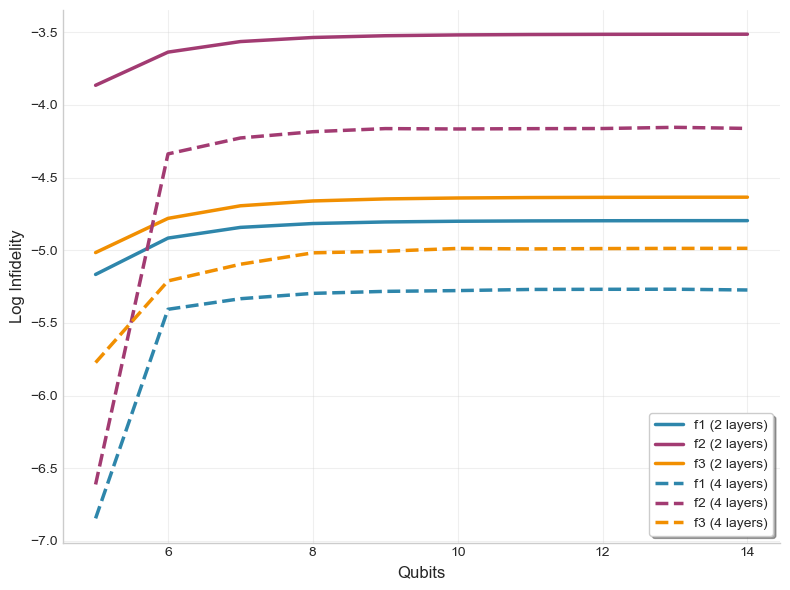

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set style for cleaner look
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for consistency
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Plot 2-layer circuits with solid lines
ax.plot(range(5,15), np.log10(l41_circ1), 
        color=colors[0], linewidth=2.5, label='f1 (2 layers)')
ax.plot(range(5,15), np.log10(l42_circ1), 
        color=colors[1], linewidth=2.5, label='f2 (2 layers)')
ax.plot(range(5,15), np.log10(l43_circ1), 
        color=colors[2], linewidth=2.5, label='f3 (2 layers)')

# Plot 4-layer circuits with dashed lines
ax.plot(range(5,15), np.log10(l41_circ2), 
        color=colors[0], linewidth=2.5, linestyle='--', label='f1 (4 layers)')
ax.plot(range(5,15), np.log10(l42_circ2), 
        color=colors[1], linewidth=2.5, linestyle='--', label='f2 (4 layers)')
ax.plot(range(5,15), np.log10(l43_circ2), 
        color=colors[2], linewidth=2.5, linestyle='--', label='f3 (4 layers)')

# Styling
ax.set_xlabel('Qubits', fontsize=12, fontweight='medium')
ax.set_ylabel('log₁₀(Infidelity)', fontsize=12, fontweight='medium')
ax.legend(frameon=True, fancybox=True, shadow=True, fontsize=10)
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()